# Project HR

Predict attrition of your valuable employees

[IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

In [81]:
# importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report

In [2]:
# import our dataset
df = pd.read_csv('data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
#view the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## DATA CLEANING

In [4]:
# view the shape of our dataset
df.shape

(1470, 35)

We have a dataset with data on 1470 employees, 34 features and a target column. Let's inspect these features and view distribution and correlation.

In [5]:
# viewing info on our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We have no missing values in any of our columns, but we alot of object data types we will be changing to cartegorical.

In [6]:
# view details on the data
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.describe(include='all')

NumExpr defaulting to 8 threads.


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00",1470,1470,"1,470.00",1470,"1,470.00","1,470.00",1470,"1,470.00","1,470.00","1,470.00",1470,"1,470.00","1,470.00","1,470.00",1470,"1,470.00",1470,"1,470.00","1,470.00","1,470.00",1470,1470,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.92,NaN,NaN,802.49,NaN,9.19,2.91,NaN,1.00,"1,024.87",2.72,NaN,65.89,2.73,2.06,NaN,2.73,NaN,"6,502.93","14,313.10",2.69,NaN,NaN,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,18.00,NaN,NaN,102.00,NaN,1.00,1.00,NaN,1.00,1.00,1.00,NaN,30.00,1.00,1.00,NaN,1.00,NaN,"1,009.00","2,094.00",0.00,NaN,NaN,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,NaN,NaN,465.00,NaN,2.00,2.00,NaN,1.00,491.25,2.00,NaN,48.00,2.00,1.00,NaN,2.00,NaN,"2,911.00","8,047.00",1.00,NaN,NaN,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,NaN,NaN,802.00,NaN,7.00,3.00,NaN,1.00,"1,020.50",3.00,NaN,66.00,3.00,2.00,NaN,3.00,NaN,"4,919.00","14,235.50",2.00,NaN,NaN,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,NaN,NaN,"1,157.00",NaN,14.00,4.00,NaN,1.00,"1,555.75",4.00,NaN,83.75,3.00,3.00,NaN,4.00,NaN,"8,379.00","20,461.50",4.00,NaN,NaN,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00


We will be dropping a few columns that hold no predictive value as follow:

* EmployeeCount: has a value of "1" for all rows
* EmployeeNumber: a sequential value that gives us no information about the rows
* StandardHours: has a value of "80" for all rows

In [7]:
# dropping columns
drop = ['EmployeeCount', 'EmployeeNumber', 'StandardHours','Over18']
df_drop = df.drop(drop, axis=1)
df_drop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [8]:
# creating a target label column
df_drop['target'] = df_drop['Attrition'].replace({'Yes':1,'No':0})

In [9]:
df_drop = df_drop.drop('Attrition',axis=1)
df_drop.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,target
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


We will be performing exploratory data analysis on our data before changing the datatypes and encoding out categorical variables.

## EDA

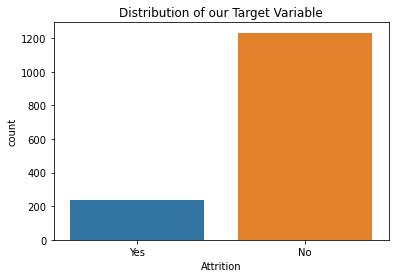

In [10]:
# view the distribution of our target variable
sns.countplot(x='Attrition',data=df)
plt.title('Distribution of our Target Variable')
plt.show()

We can see our target variable is highly imbalanced and we will have to balance it before training to avoid bias in our model.

In [11]:
# create lists of numerical and object columns
num_cols = df_drop.select_dtypes(include=['float64', 'int64']).columns.tolist()
obj_cols = df_drop.select_dtypes(include=['object']).columns.tolist()
obj_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

<AxesSubplot:>

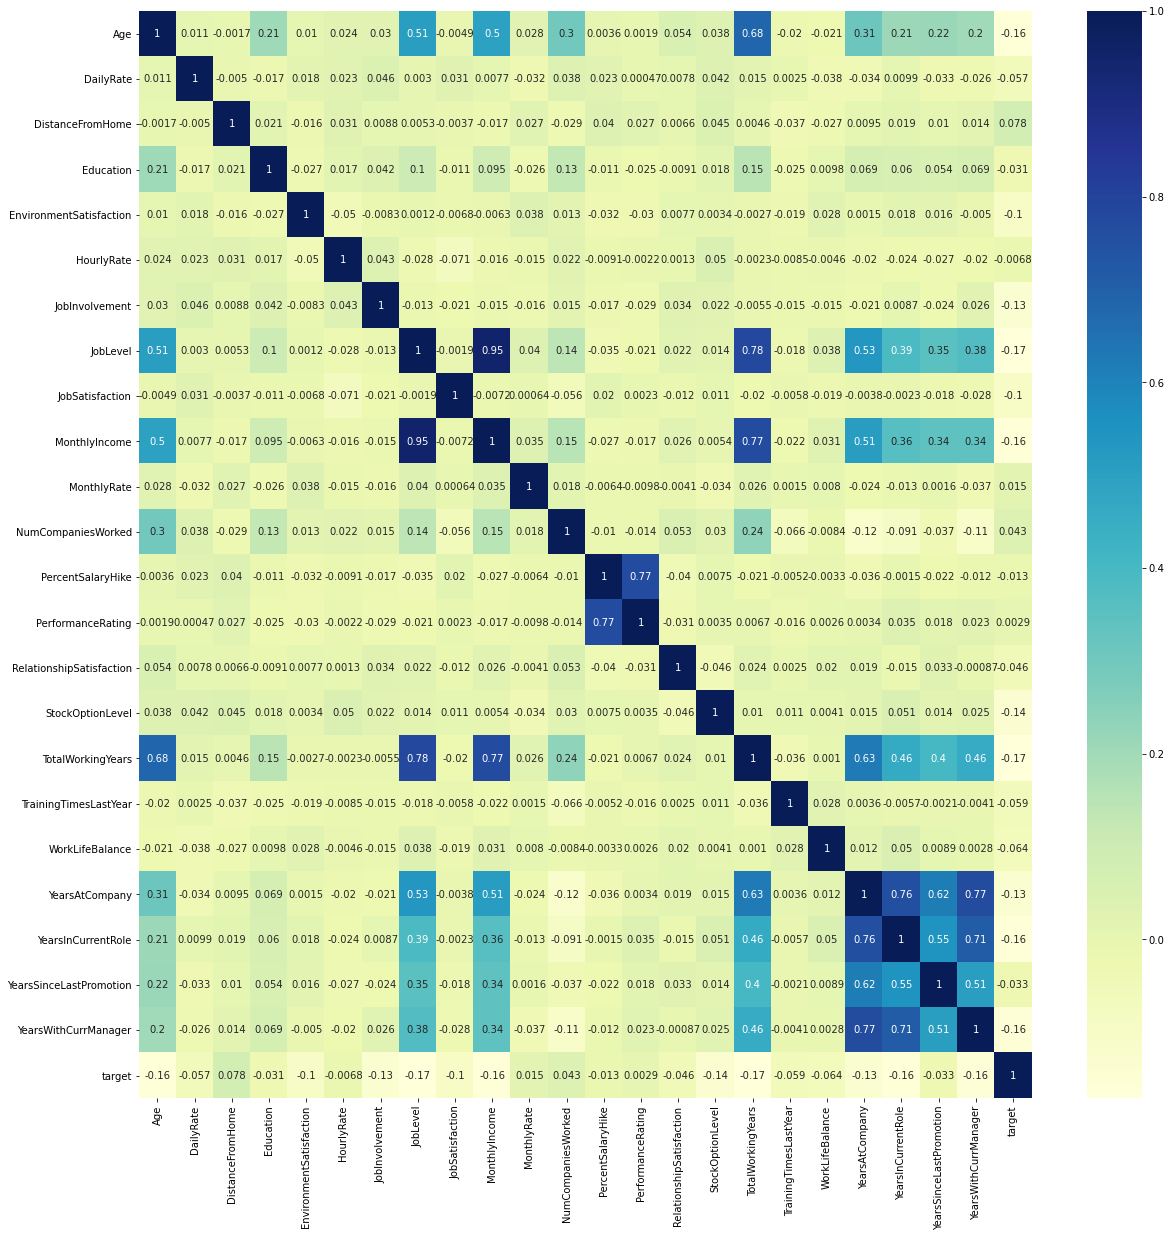

In [12]:
# view the correlation in our dataset
plt.figure(figsize=(20,20))
sns.heatmap(df_drop[num_cols].corr(),cmap='YlGnBu',annot=True) 

Using 0.7 as a threshold, we can observe that a few of the features are highly correlated with each other:
* Performance rating and Percent salary hike (0.77)
* Total working years and Monthly Income (0.77)
* Total working years and job level (0.78)
* Monthly Income and job level (0.95)

We will be will drop job level for now, then experiment dropping other columns and testing the accuracy if we need to.

In [13]:
# dropping jobLevel
df_drop = df_drop.drop('JobLevel',axis=1)

In [14]:
# viewing features with the highest correlation
df_drop.corr()['target'].sort_values()

TotalWorkingYears          -0.17
YearsInCurrentRole         -0.16
MonthlyIncome              -0.16
Age                        -0.16
YearsWithCurrManager       -0.16
StockOptionLevel           -0.14
YearsAtCompany             -0.13
JobInvolvement             -0.13
JobSatisfaction            -0.10
EnvironmentSatisfaction    -0.10
WorkLifeBalance            -0.06
TrainingTimesLastYear      -0.06
DailyRate                  -0.06
RelationshipSatisfaction   -0.05
YearsSinceLastPromotion    -0.03
Education                  -0.03
PercentSalaryHike          -0.01
HourlyRate                 -0.01
PerformanceRating           0.00
MonthlyRate                 0.02
NumCompaniesWorked          0.04
DistanceFromHome            0.08
target                      1.00
Name: target, dtype: float64

Let's view the distribution of a few of our features with the highest correlation to our target variable

In [15]:
# defining a function to view distribution of numeric features
def plot_dist(col,data=df):
    plt.figure(figsize=(10,15))
    plt.subplot(2,1,1)
    sns.histplot(data=data[data['Attrition'] == 'No'],x=col, bins=10)
    plt.title(f'Distribution of {col} Stayed')
    plt.subplot(2,1,2)
    sns.histplot(data=data[data['Attrition'] == 'Yes'],x=col, bins=10)
    plt.title(f'Distribution of {col} Attrited')
    plt.plot()

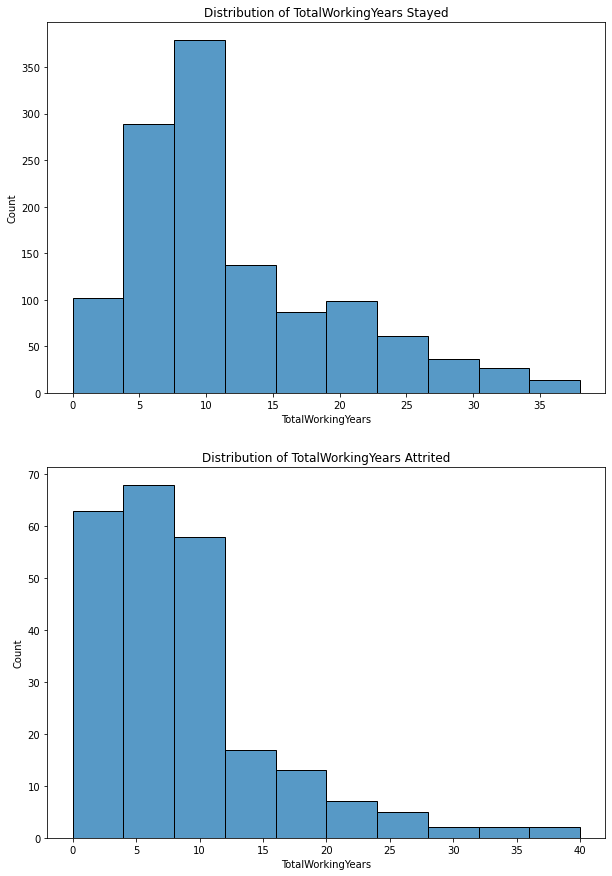

In [16]:
# plotting distribution of TotalWorkingYears
plot_dist('TotalWorkingYears')

We can see a slight difference in the distribution of total working years for staff that stayed and those that churned. We can see from the histograms that staff with less working years are at a higher risk of attrition.

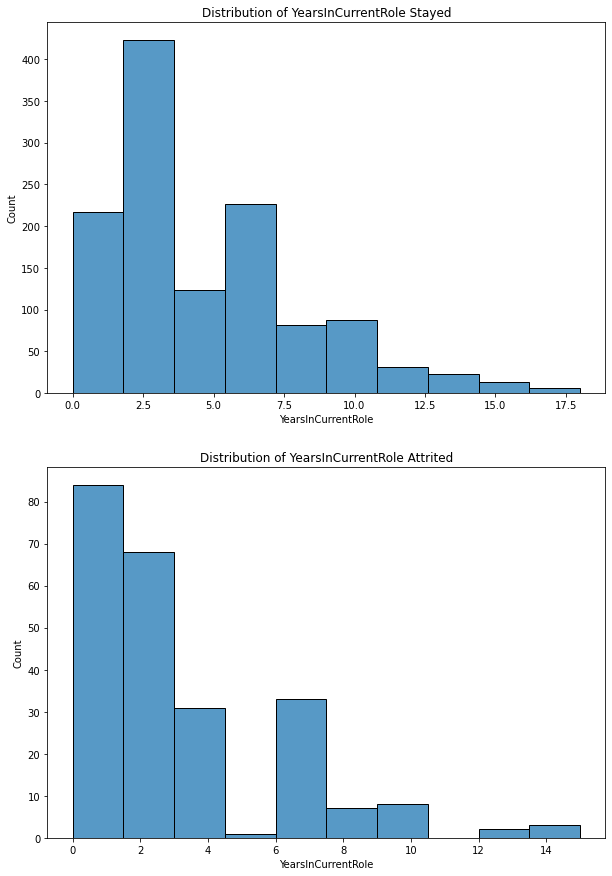

In [17]:
plot_dist('YearsInCurrentRole')

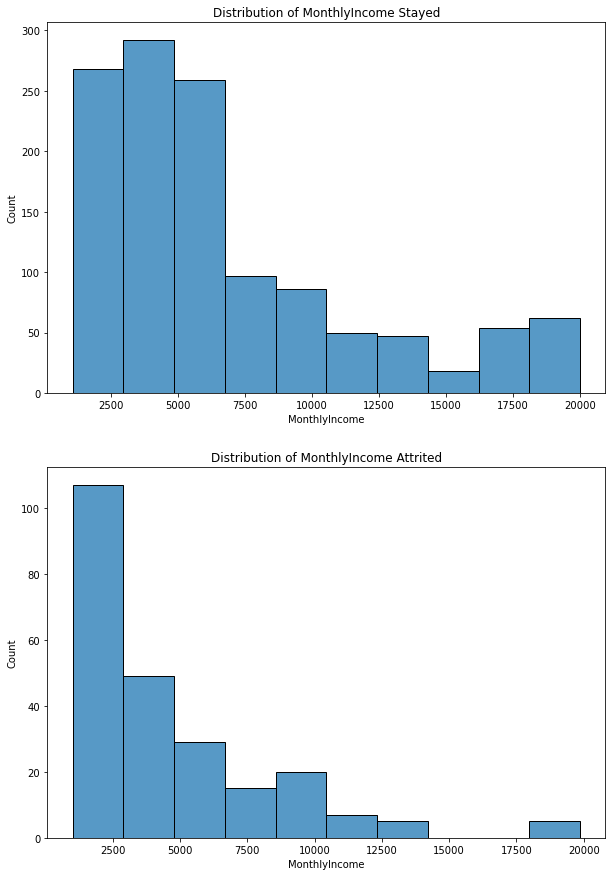

In [18]:
plot_dist('MonthlyIncome')

From the few distributions we viewed we can see that a higer proportion of the staff that leave have low momthly income, years in current role and total working years.

In [19]:
# define a function to view distribution of categorical variables
def plot_count(col,data=df):
    sns.countplot(x=col, data=data,hue='Attrition')
    plt.xticks(rotation=60)
    plt.title(f'Distribution of {col}')
    plt.show()

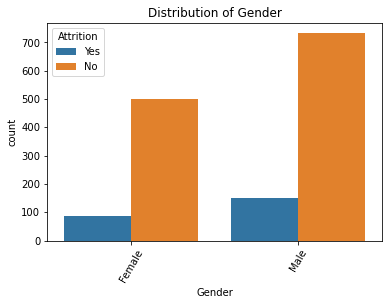

In [20]:
# plot the distribution of gender and checking for a relationship with Attrition
plot_count('Gender')

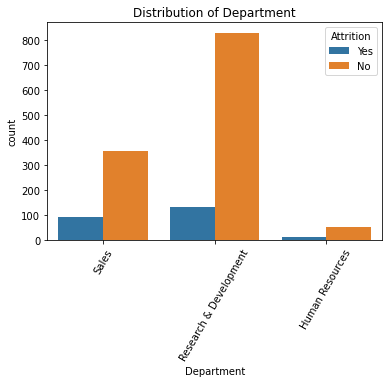

In [21]:
# plot the distribution of department and checking for a relationship with Attrition
plot_count('Department')

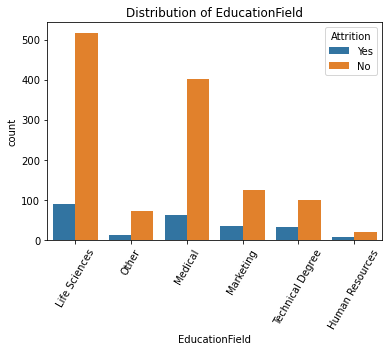

In [22]:
# plot the distribution of EducationField and checking for a relationship with Attrition
plot_count('EducationField')

## Train and Evaluate a Model

In [23]:
# encoding our categorical variables
df_enc = pd.get_dummies(df_drop, columns=obj_cols,drop_first=True)
df_enc.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,target,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [24]:
# split our data into features and target variable
y = df_enc['target']
X = df_enc.drop('target',axis=1)
y.value_counts()

0    1233
1     237
Name: target, dtype: int64

In [25]:
# balance our dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled.value_counts()

0    1233
1    1233
Name: target, dtype: int64

In [26]:
# split our data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, shuffle=True, test_size=0.3)

## Support Vector Classifier

In [27]:
# instantiate our classifier object and train our model
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [28]:
# make predictions and evaluate our model
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
svc_f1 = f1_score(y_test, svc_pred)
print(f"Accuracy Score: {svc_acc}\nF1 Score {svc_f1}")

Accuracy Score: 0.595945945945946
F1 Score 0.6331288343558282


Our support vector classifier only had an accuracy of 60%, we will be testing other models to try and get higher accuracy values.

## Decision Tree Classifier

In [29]:
# instantiate our classifier object and train our model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# make predictions and evaluate our model
tree_pred = tree.predict(X_test)
tree_acc = accuracy_score(y_test, tree_pred)
tree_f1 = f1_score(y_test, tree_pred)
print(f"Accuracy Score: {tree_acc}\nF1 Score {tree_f1}")

Accuracy Score: 0.845945945945946
F1 Score 0.8553299492385787


Our decision tree classifier performed alot better. We will attempt training and evaluating another model.

## Random Forest Classifier

In [31]:
# instantiate our classifier object and train our model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# make predictions and evaluate our model 
rfc_pred = rfc.predict(X_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_f1 = f1_score(y_test, rfc_pred)
print(f"Accuracy Score: {rfc_acc}\nF1 Score {rfc_f1}")

Accuracy Score: 0.9162162162162162
F1 Score 0.9179894179894179


In [33]:
# checking the precision and recall scores for our random forest model
recall = recall_score(y_test, rfc_pred)
precision = precision_score(y_test, rfc_pred)
print(f"Precision score: {precision}\nRecall score: {recall}")

Precision score: 0.9378378378378378
Recall score: 0.8989637305699482


Our random forest model performed very well when evaluating with our test set. We will be attepting to improve the performance of this model by hyper-parameter tuning.

## Hyperparameter Tuning

In [34]:
# import gridsearchcv
from sklearn.model_selection import GridSearchCV

In [75]:
# define parameter grid
param_grid = {'n_estimators':[150,200,250],
             'max_depth': np.arange(10,20),
             'bootstrap': [True, False]}

In [76]:
# Create an instance of GridSearchCV
grid_search = GridSearchCV(rfc,param_grid,cv=5,scoring=('accuracy','recall','precision'),verbose=1,refit='accuracy')

In [77]:
# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'n_estimators': [150, 200, 250]},
             refit='accuracy', scoring=('accuracy', 'recall', 'precision'),
             verbose=1)

In [78]:
# view the best score and best parameters from our grid search
print(f"Best score: {grid_search.best_score_}\nBest Params: {grid_search.best_params_}")

Best score: 0.9298936081092402
Best Params: {'bootstrap': False, 'max_depth': 13, 'n_estimators': 150}


In [79]:
# intantiate and train our model with the best parameters
model = RandomForestClassifier(bootstrap=False, max_depth=13, n_estimators=150)

In [80]:
# train our model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=13, n_estimators=150)

In [84]:
# make predictions and evaluate our model
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       354
           1       0.95      0.91      0.93       386

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740

